In [8]:
import requests
from tqdm import tqdm
import time


In [9]:
app_key = 'KakaoAK ' + 'OPENAPIKEY'

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

params = {
    'query': '치킨',
    'category_group_code': 'FD6', # 음식점
    'page': 45
}

headers = {
    'Authorization': app_key
}

res = requests.get(url, params=params, headers=headers).json()

print(res.keys())

dict_keys(['documents', 'meta'])


In [10]:
res['documents']

[{'address_name': '부산 금정구 장전동 146-2',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '8860320',
  'phone': '051-514-3885',
  'place_name': '뉴숯불통닭 본점',
  'place_url': 'http://place.map.kakao.com/8860320',
  'road_address_name': '부산 금정구 금강로335번길 55',
  'x': '129.0834297751688',
  'y': '35.23775776866604'},
 {'address_name': '서울 서초구 잠원동 72-2',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '8611462',
  'phone': '02-596-5990',
  'place_name': '한신치킨',
  'place_url': 'http://place.map.kakao.com/8611462',
  'road_address_name': '서울 서초구 신반포로23길 30',
  'x': '127.003565002416',
  'y': '37.5087818347685'},
 {'address_name': '서울 종로구 관철동 44-1',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '26884480',
  'phone': '02-722-9992',
  'place_name': '미친닭 종각본점',
  'place_url': 'http://pl

In [11]:
res['meta']

{'is_end': True,
 'pageable_count': 45,
 'same_name': {'keyword': '치킨', 'region': [], 'selected_region': ''},
 'total_count': 56442}

In [12]:
params = {
    'query': '치킨',
    'page': 46
}

res = requests.get(url, params=params, headers=headers).json()

print(res)


{'errorType': 'InvalidArgument', 'message': 'page is more than max'}


In [13]:
from tinydb import TinyDB, Query

db = TinyDB('db.json')

In [14]:
# start_x = 126 # 126.0 - 130.0
# start_y = 33 # 33.0 - 39.0

# dx = 0.25
# dy = 0.25

# for i in tqdm(range(18)):
#     for j in range(26):
#         x = start_x + dx * i
#         y = start_y + dy * j
#         print(x, y)

#         for page in range(1, 46):
#             params = {
#                 'query': '치킨',
#                 'page': page,
#                 'rect': f'{x},{y},{x + dx},{y + dy}'
#             }

#             res = requests.get(url, params=params, headers=headers).json()
            
#             if len(res['documents']) == 0:
#                 break

#             for doc in res['documents']:
#                 place_name = doc['place_name']

#                 detail_url = f'https://place.map.kakao.com/main/v/{doc["id"]}'

#                 data = requests.get(detail_url, headers=headers).json()

#                 if 'menuInfo' not in data:
#                     continue

#                 menu_list = data['menuInfo']['menuList']

#                 for menu_item in menu_list:
#                     price = 0
#                     if 'price' in menu_item:
#                         price = int(menu_item['price'].replace(',', ''))

#                     db.insert({
#                         'place_name': place_name,
#                         'menu': menu_item['menu'],
#                         'price': price
#                     })
                
#                 time.sleep(5)

#             if res['meta']['is_end']:
#                 break

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

126.0 33.0
126.0 33.25
126.0 33.5
126.0 33.75
126.0 34.0
126.0 34.25
126.0 34.5
126.0 34.75
126.0 35.0
126.0 35.25
126.0 35.5
126.0 35.75
126.0 36.0
126.0 36.25
126.0 36.5
126.0 36.75
126.0 37.0
126.0 37.25
126.0 37.5
126.0 37.75
126.0 38.0
126.0 38.25
126.0 38.5
126.0 38.75
126.0 39.0
126.0 39.25


  6%|████▌                                                                             | 1/18 [02:18<39:20, 138.86s/it]

126.25 33.0
126.25 33.25
126.25 33.5
126.25 33.75
126.25 34.0
126.25 34.25
126.25 34.5
126.25 34.75
126.25 35.0
126.25 35.25
126.25 35.5
126.25 35.75
126.25 36.0
126.25 36.25
126.25 36.5
126.25 36.75
126.25 37.0


  6%|████▍                                                                          | 1/18 [22:37<6:24:42, 1357.80s/it]


ValueError: invalid literal for int() with base 10: '변동가격'

In [15]:
db

<TinyDB tables=['_default'], tables_count=1, default_table_documents_count=2490, all_tables_documents_count=['_default=2490']>

In [16]:
db.search(Query().price > 35000)

[{'place_name': '마담나탈리소셜클럽', 'menu': '글렌피딕 15Y', 'price': 250000},
 {'place_name': '굽네치킨 모슬포점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 모슬포점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 제주노형점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 제주노형점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 제주연동점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 제주연동점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 애월점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 애월점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 진도점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 진도점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 영암삼호점'

In [17]:
db.search((Query().price > 35000) & (Query().menu.search('치')))

[{'place_name': '굽네치킨 모슬포점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 모슬포점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 제주노형점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 제주노형점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 제주연동점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 제주연동점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 애월점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 애월점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 진도점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},
 {'place_name': '굽네치킨 진도점',
  'menu': '불금치킨+바비큐 시카고 피자+콜라 1.25L',
  'price': 37000},
 {'place_name': '굽네치킨 영암삼호점',
  'menu': '불금치킨+바비큐 시카고 피자+에그미니 타르트+콜라 1.25L',
  'price': 40800},

In [18]:
chickens = db.search(Query().menu.search('치'))

prices = []

for chicken in chickens:
    prices.append(chicken['price'])
    
avg_price = sum(prices) / len(prices)

print('치킨 %d개의 평균 가격은 %.2f원 입니다' % (len(chickens), avg_price))

치킨 990개의 평균 가격은 19526.97원 입니다


<AxesSubplot:ylabel='Count'>

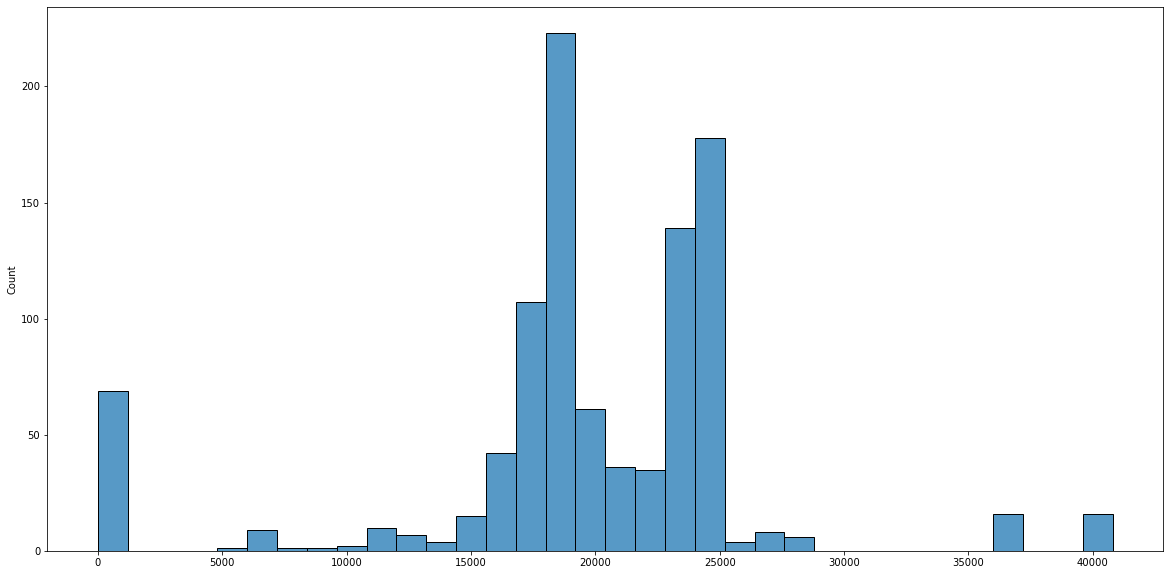

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(x=prices, ax=ax)